In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
## Load section
df = pd.read_csv('Output/Org/Splitted_HRV_pts.csv')

In [3]:
df.head()

,Name,Points,Stage
0,SN001,"[126, 204, 295, 175, 211, 230, 187, 189, 266, ...",Sleep stage N1
1,SN001,"[185, 274, 193, 270, 114, 253, 115, 191, 185, ...",Sleep stage N1
2,SN001,"[198, 223, 127, 178, 118, 173, 122, 165, 131, ...",Sleep stage N1
3,SN001,"[135, 203, 118, 129, 206, 143, 117, 183, 215, ...",Sleep stage N2
4,SN001,"[202, 293, 198, 205, 197, 127, 157, 111, 187, ...",Sleep stage N2


In [4]:
len(df)

14685

In [5]:
indexes = [np.random.randint(len(df)) for i in range(8)]
print(indexes)

[4770, 1944, 8541, 1910, 11591, 3374, 8811, 4929]


In [4]:
#[4839, 3472, 4626, 14203, 7994, 3520, 5817, 10895]
indexes = np.array([4839, 3472, 4626, 14203, 7994, 3520, 5817, 10895])
indexes

array([ 4839,  3472,  4626, 14203,  7994,  3520,  5817, 10895])

In [5]:
def string_to_int(index):
    #Reading File and Trun into Array
    text = df['Points'][index]
    text = ast.literal_eval(text)
    return text

In [6]:
def poincare(text):
    n1 = [text[i]/256 for i in range(0,len(text)-1)]
    n2 = [text[i]/256 for i in range(1,len(text))]
    return [n1,n2]

In [ ]:
string_to_int(indexes[2])

In [8]:
print([np.max(l) for l in [string_to_int(indexes[j]) for j in range(8)]]) #Super Complex

[405, 388, 310, 192, 324, 376, 508, 348]


In [71]:
matrix = np.zeros(shape = (22,22))
z=0
for i in range(484):
    z = int(i/22)
    for j in string_to_int(indexes[5]):
        t= int(i-(z*22))
        if j == i:
            matrix[z][t] += 1
            # print(z)

<AxesSubplot: >

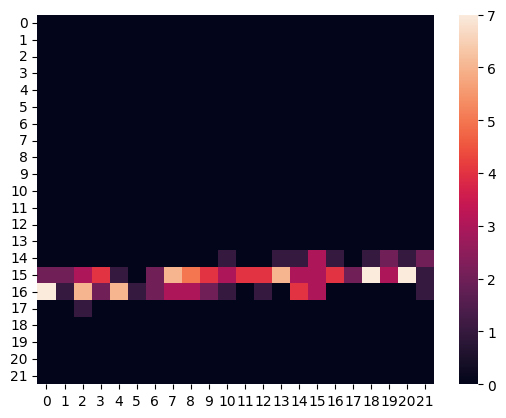

In [72]:
sns.heatmap(matrix)

In [30]:
temp = poincare(string_to_int(indexes[2]))
zz=0
for idx, item in enumerate(temp[0]):
    if item == temp[1][idx]:
        zz+=1
zz

1

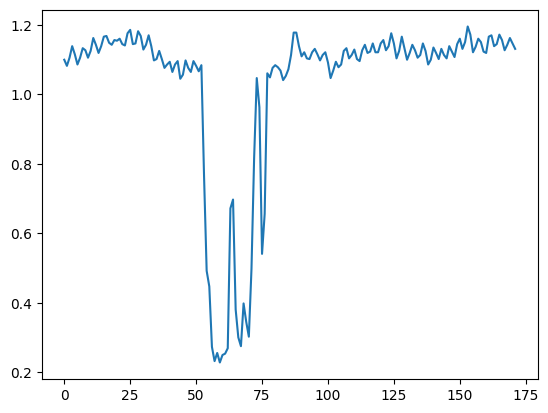

In [31]:
# Mean based HRV
n1 = np.array(temp[0])
n2 = np.array(temp[1])
new = (n1 + n2) /2
plt.plot(new)
# new 

In [32]:
print(f'n1 : len = {len(n1)}, Max = {np.max(n1)}, Min = {np.min(n1)}, Range = {np.max(n1) - np.min(n1)}, step = {(np.max(n1) - np.min(n1)) / len(n1)}')
print(f'n2 : len = {len(n2)}, Max = {np.max(n2)}, Min = {np.min(n2)}, Range = {np.max(n2) - np.min(n2)}, step = {(np.max(n2) - np.min(n2)) / len(n2)}')

n1 : len = 172, Max = 1.2109375, Min = 0.203125, Range = 1.0078125, step = 0.005859375
n2 : len = 172, Max = 1.2109375, Min = 0.203125, Range = 1.0078125, step = 0.005859375


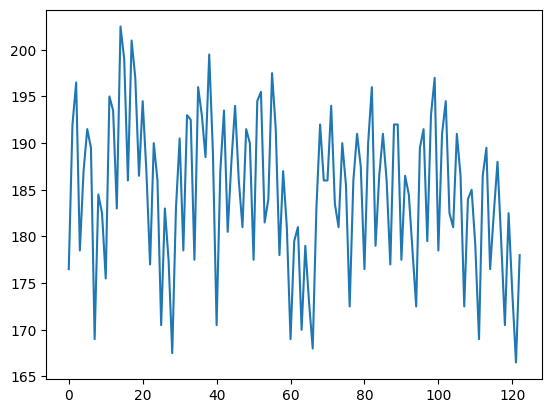

In [33]:
plt.plot(np.array(string_to_int(indexes[0]))/2)

In [81]:
print(temp[0][:10])
print(temp[1][:10])

[1.37109375, 1.3828125, 1.296875, 1.359375, 1.40234375, 1.38671875, 1.33203125, 1.3828125, 1.421875, 1.43359375]
[1.3828125, 1.296875, 1.359375, 1.40234375, 1.38671875, 1.33203125, 1.3828125, 1.421875, 1.43359375, 1.33203125]


In [ ]:
fig, ax = plt.subplots(3,2, figsize=(18,12))

In [9]:
def mean_poin(temp):
    n1 = np.array(temp[0])
    n2 = np.array(temp[1])
    mean = (n1 + n2) /2
    return mean

In [11]:
def reshaper(ind):
    matrix = np.zeros(shape = (22,22))
    z=0
    for i in range(484):
        z = int(i/22)
        for j in string_to_int(indexes[ind]):
            t= int(i-(z*22))
            if j == i:
                matrix[z][t] += 1
    return matrix

In [ ]:
def reshaper_poin(ind, level=1):
    matrix = np.zeros(shape = (122,122))
    poincare(string_to_int(indexes[ind]))
    for i in range(14884):
        z = int(i/122)
        for j in string_to_int(indexes[ind]):
            t= int(i-(z*122))
            if j == i:
                matrix[z][t] += 1
    return matrix

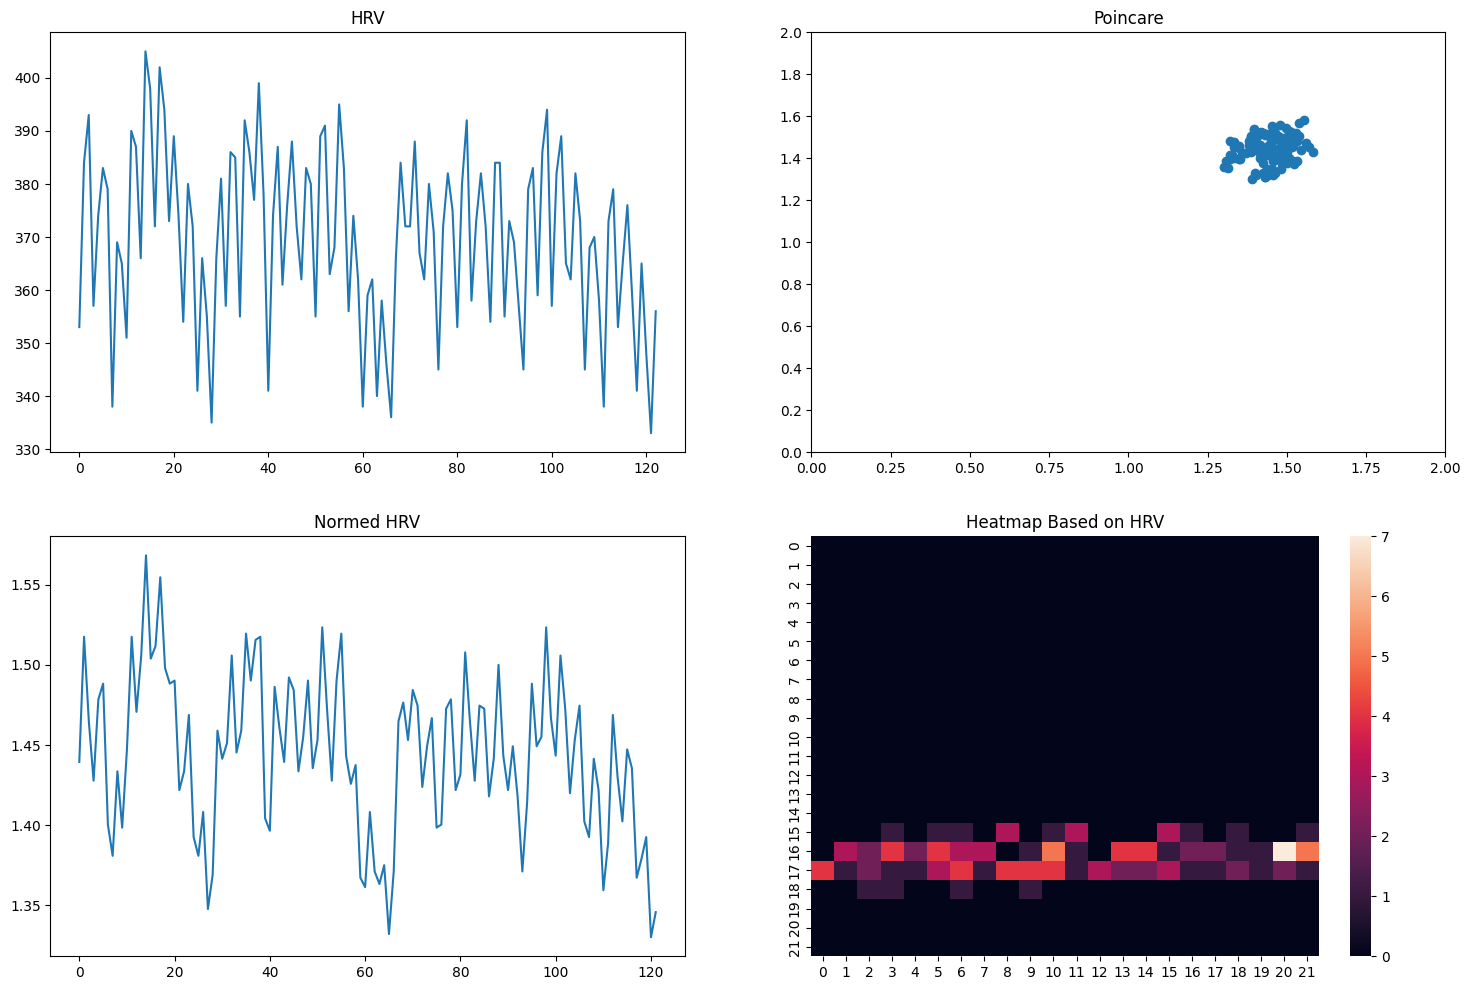

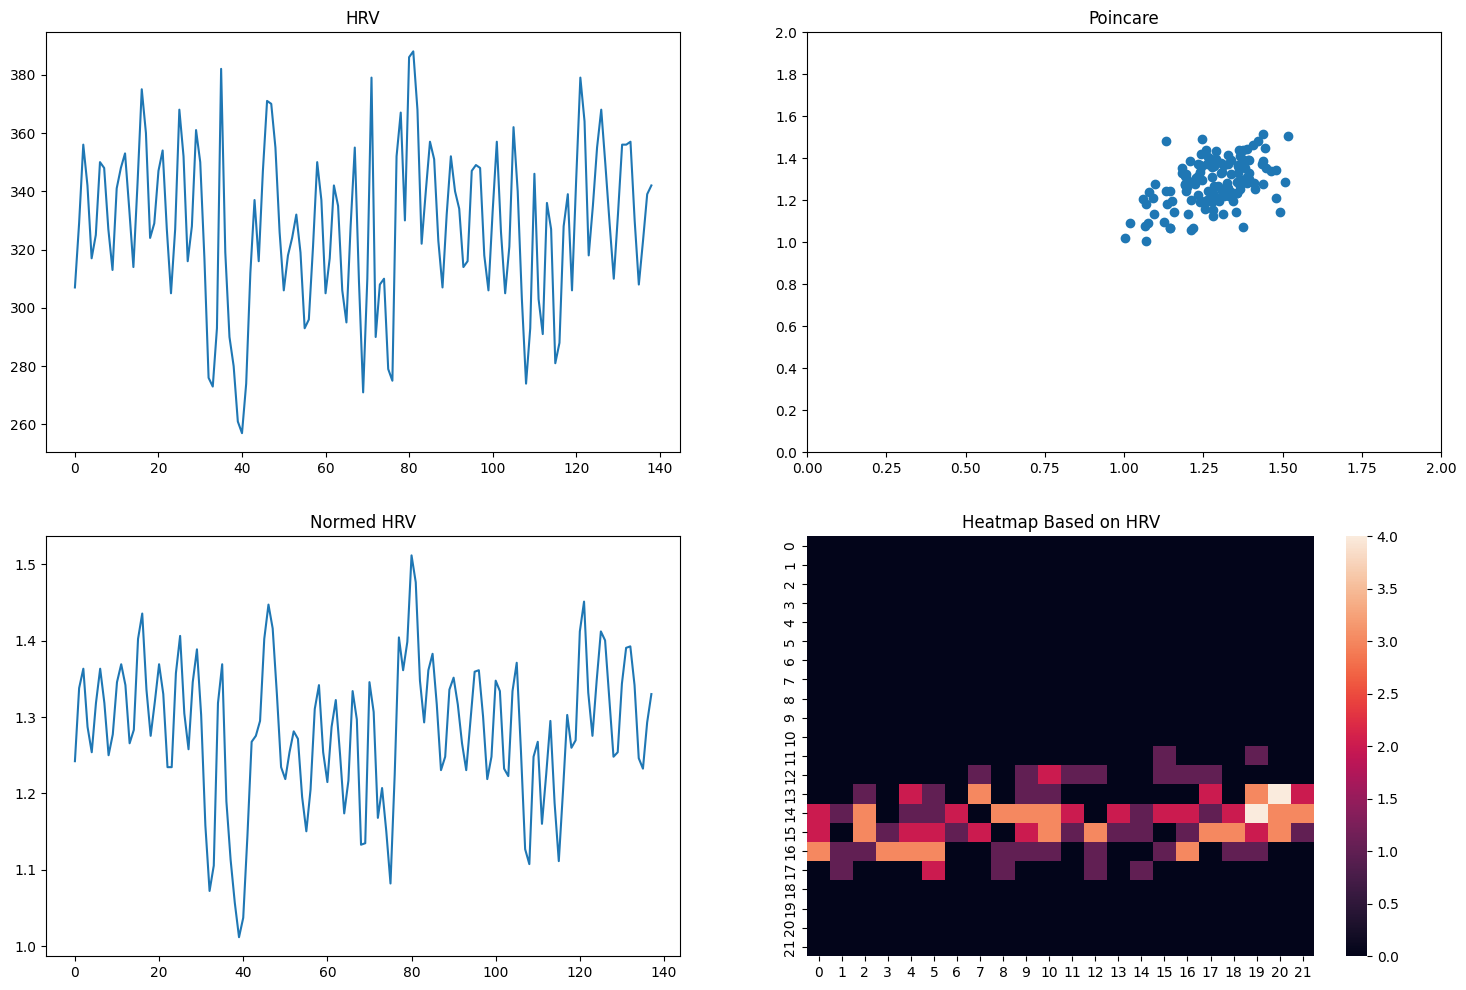

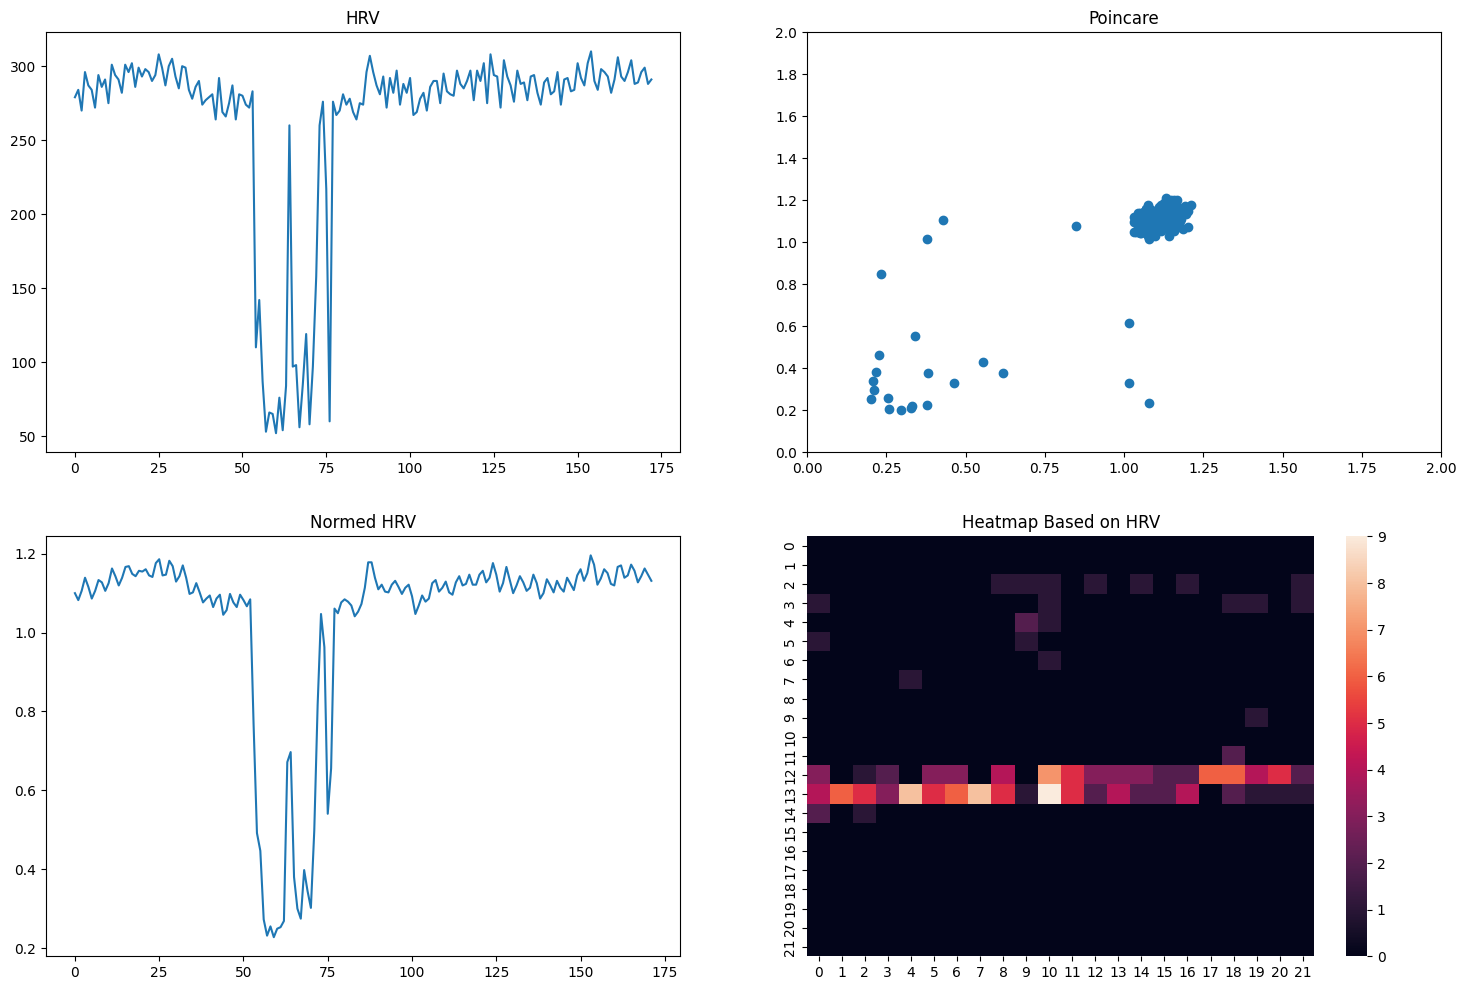

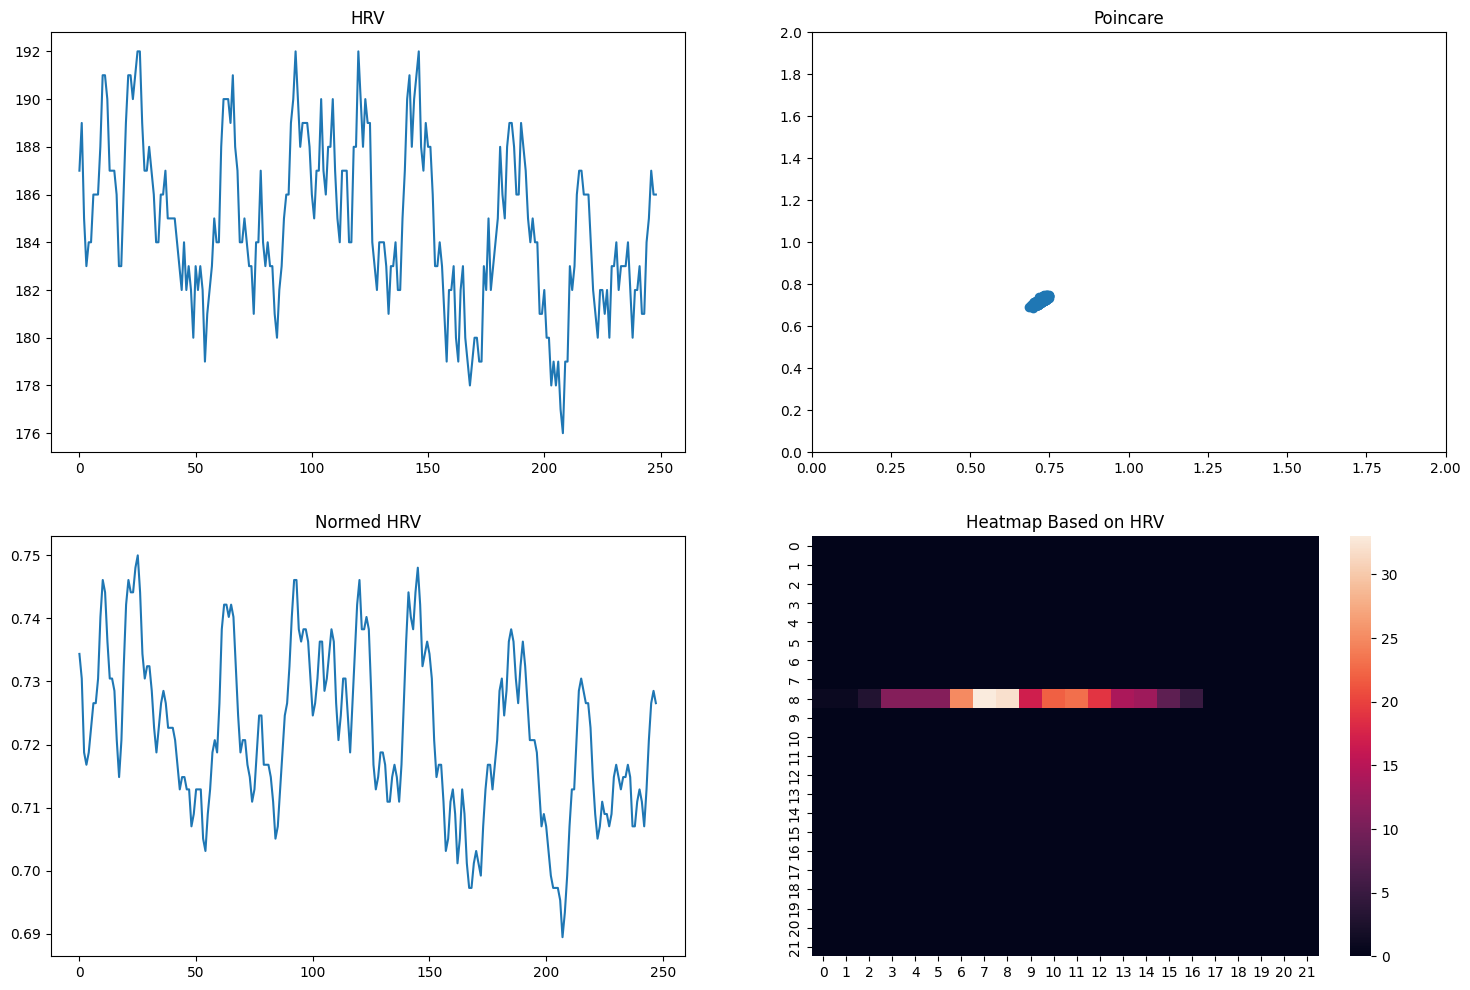

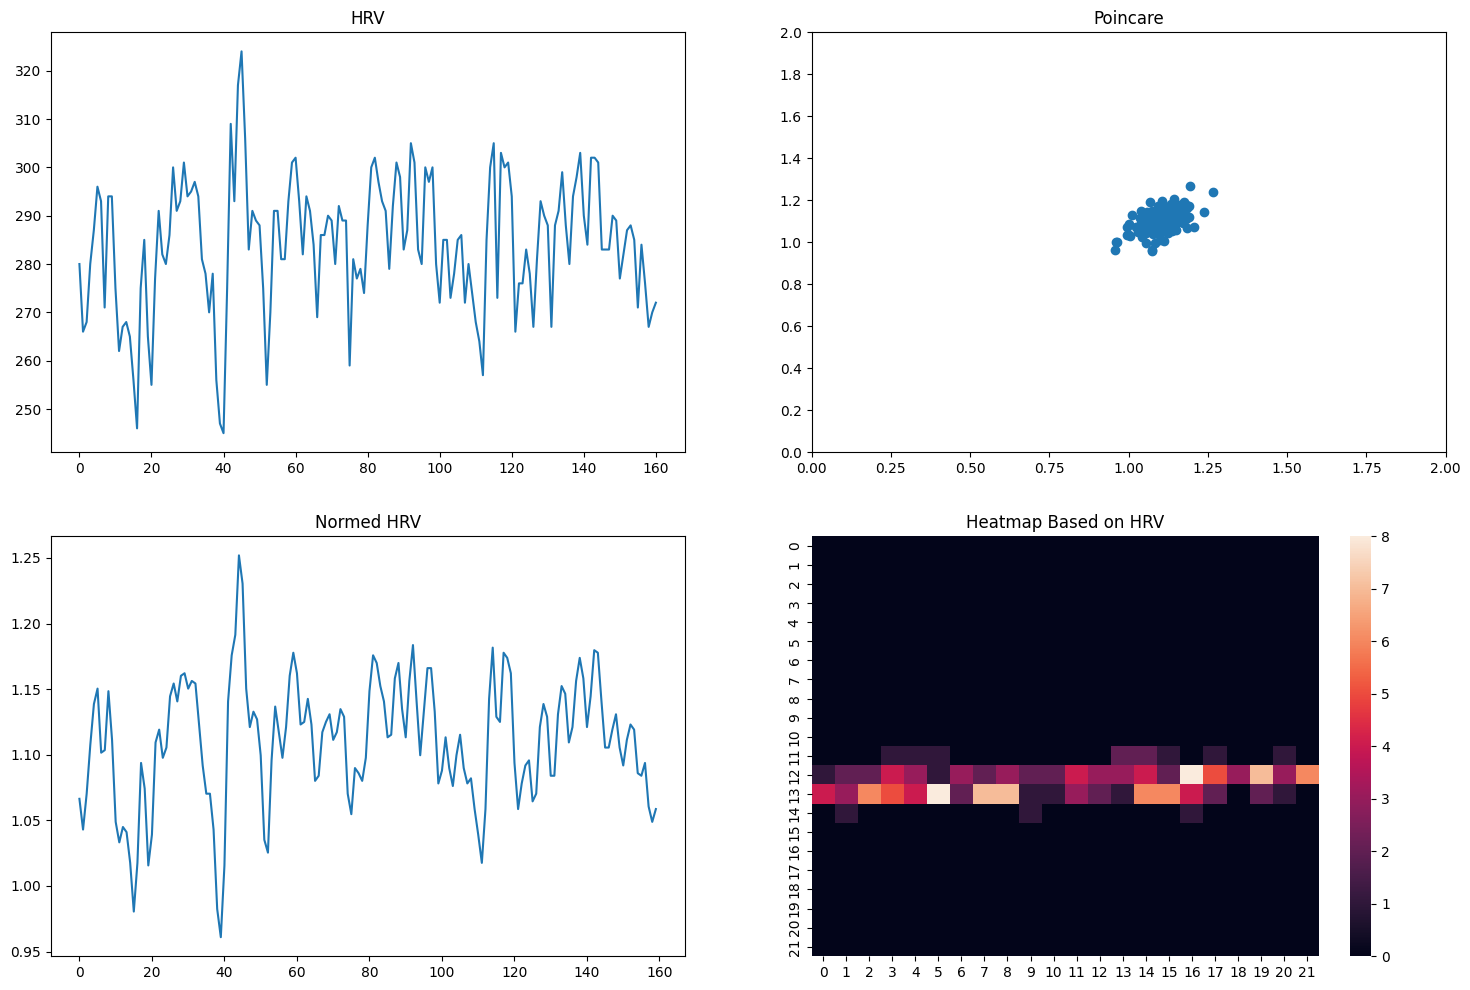

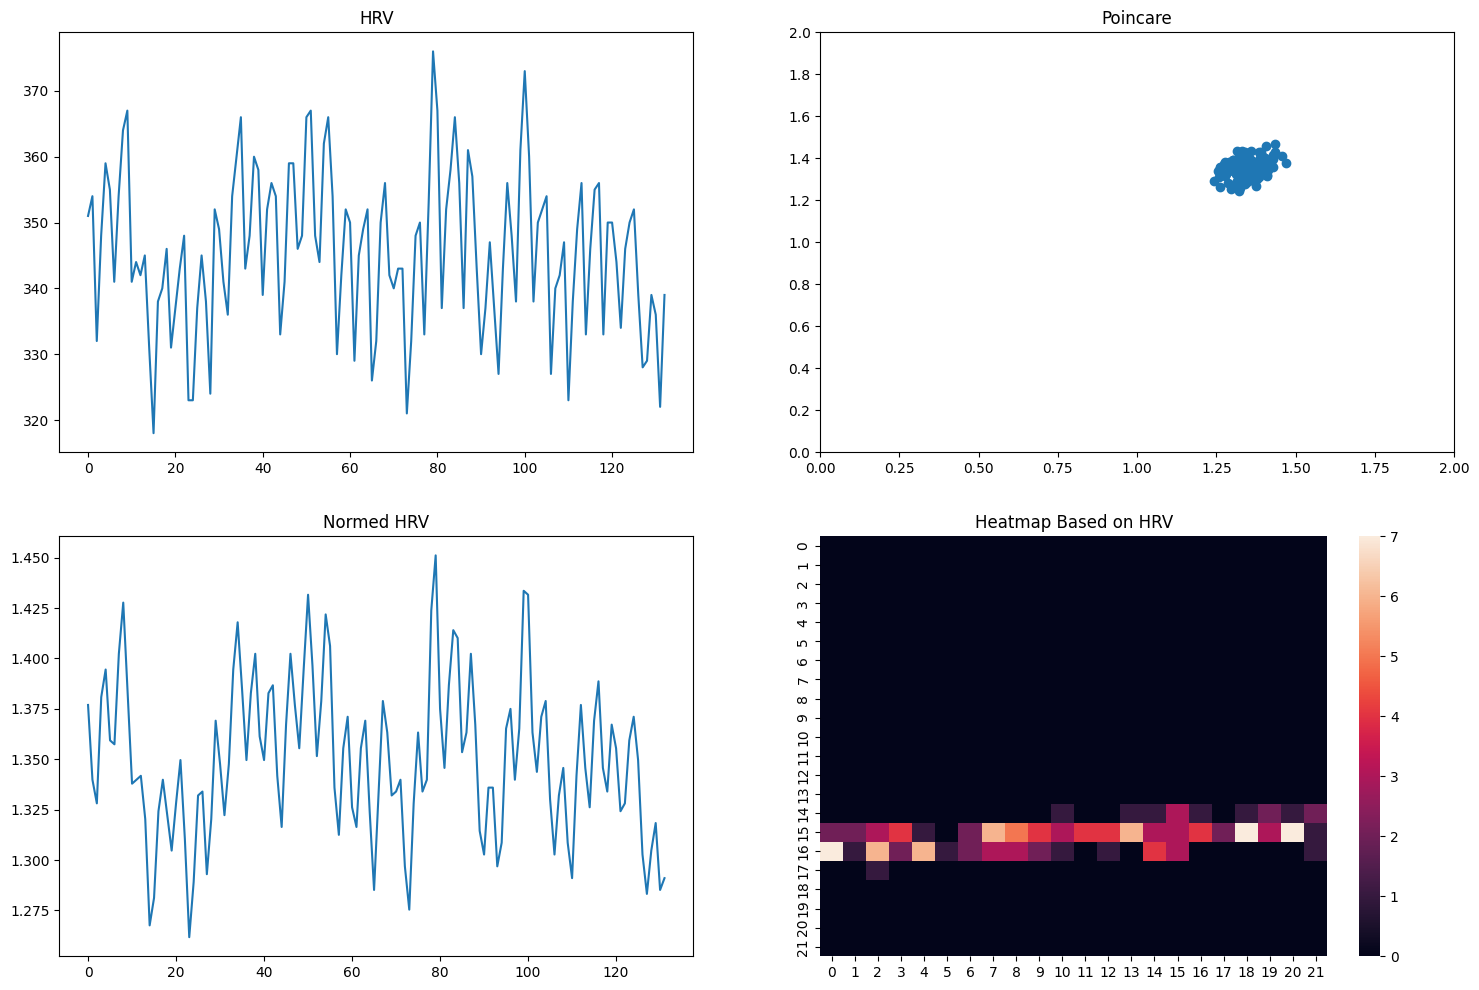

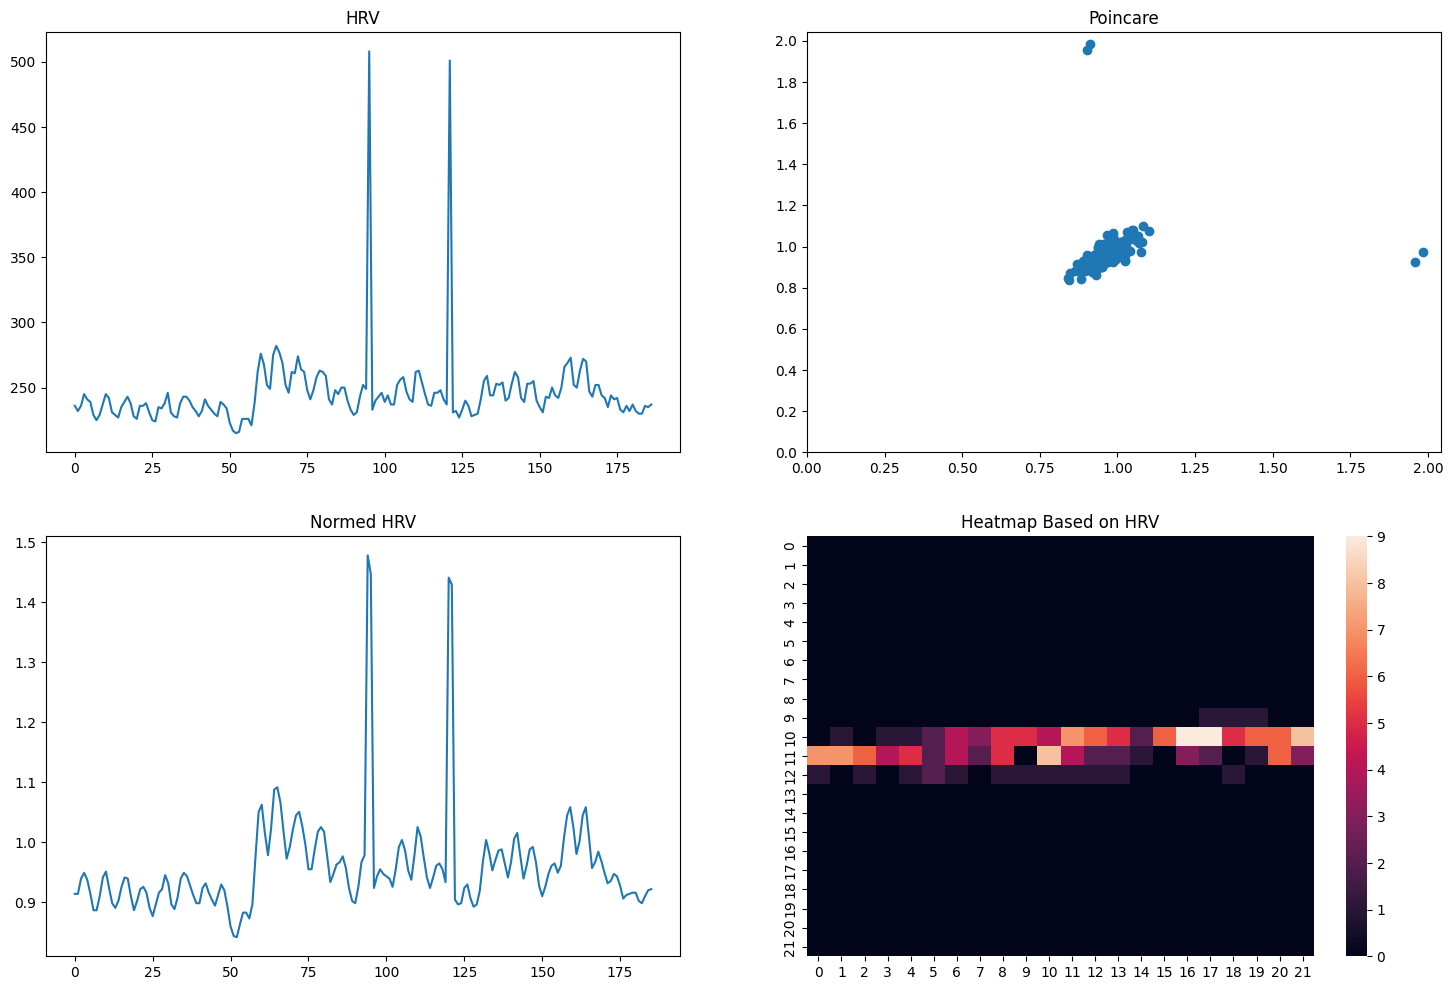

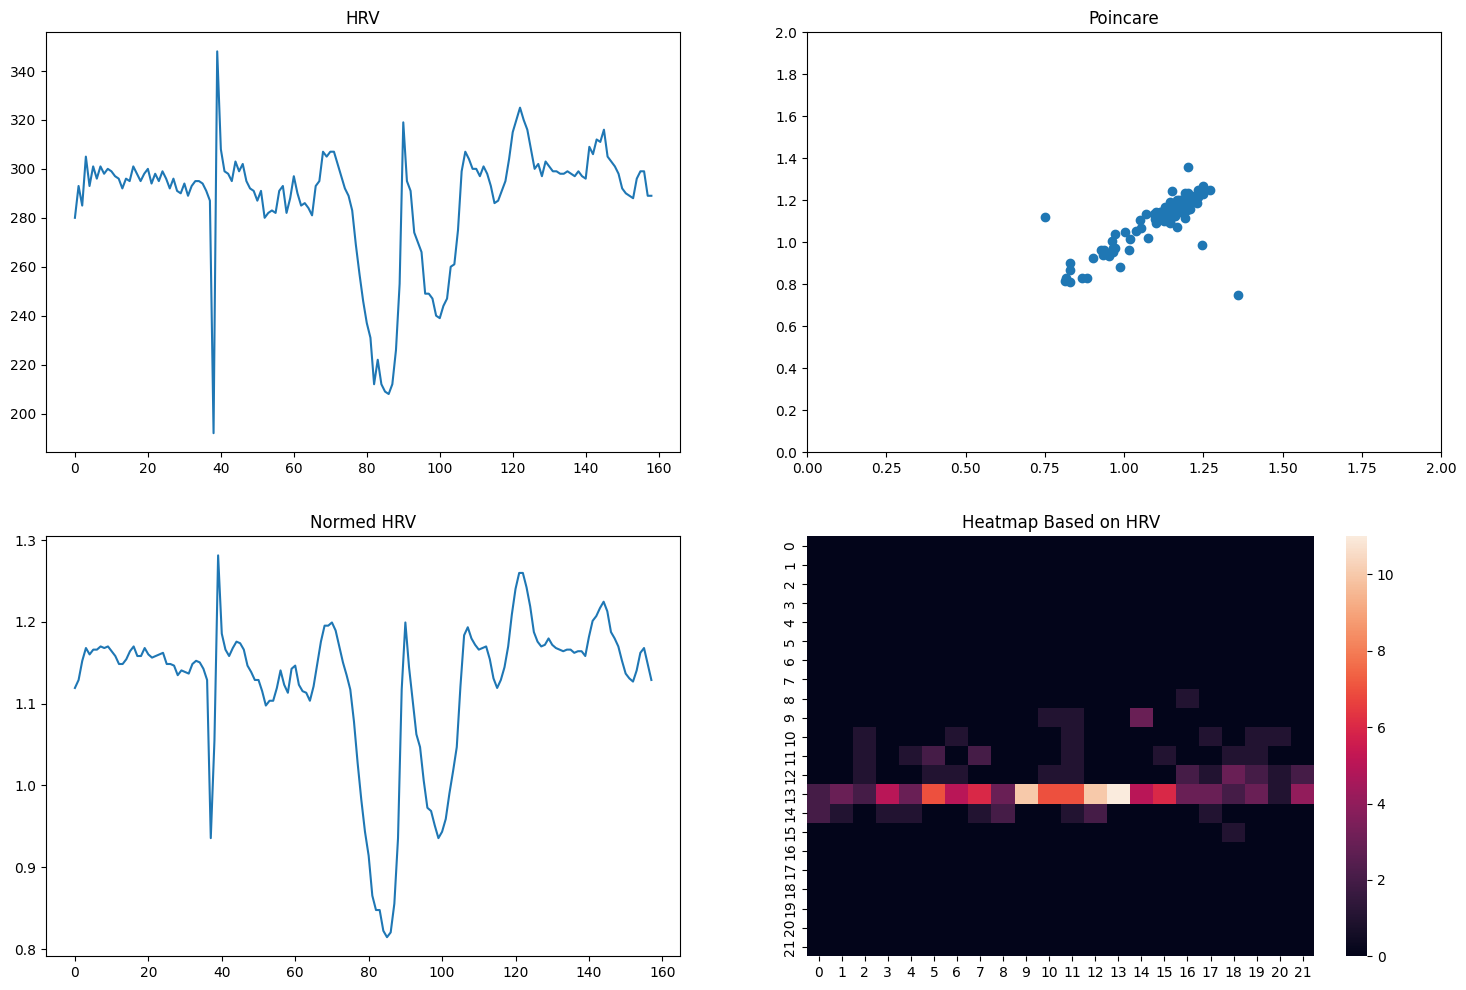

In [110]:
## Heatmap based on HRV
for i in range(8):
    fig, ax = plt.subplots(2,2, figsize=(18,12))
    points = string_to_int(indexes[i])
    poincare_pts = poincare(points)
    ax[0,0].plot(points)
    ax[0,0].set_title('HRV')
    #---
    ax[1,0].plot(mean_poin(poincare_pts))
    ax[1,0].set_title('Normed HRV')
    #---
    ax[0,1].scatter(poincare_pts[1], poincare_pts[0])
    ax[0,1].set_xticks(np.arange(0, 2.2, step=0.25))
    ax[0,1].set_yticks(np.arange(0, 2.2, step=0.2))
    ax[0,1].set_title('Poincare')
    #--
    sns.heatmap(reshaper(i), ax=ax[1,1])
    ax[1,1].set_title('Heatmap Based on HRV')

    fig.savefig(f'Output/Compare_Heatmap/File{i+1}.png', dpi=300)

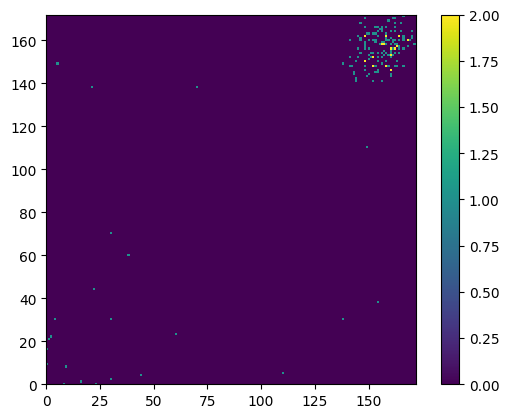

In [67]:
heatmap, xedges, yedges = np.histogram2d(n2, n1, bins=len(n2))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
hmap = plt.pcolor(heatmap)
plt.colorbar(hmap)
plt.show()

In [68]:
heatmap.shape

(172, 172)

In [69]:
heatmap.max()

2.0

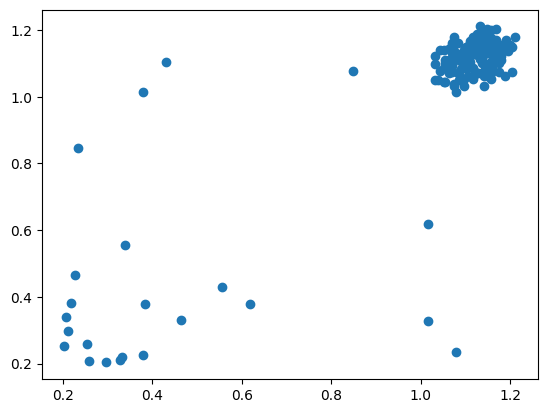

In [85]:
plt.scatter(n2,n1)

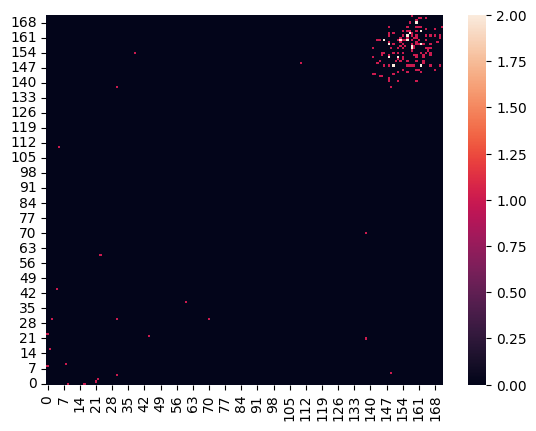

In [70]:
ax = sns.heatmap(heatmap.T)
ax.invert_yaxis()

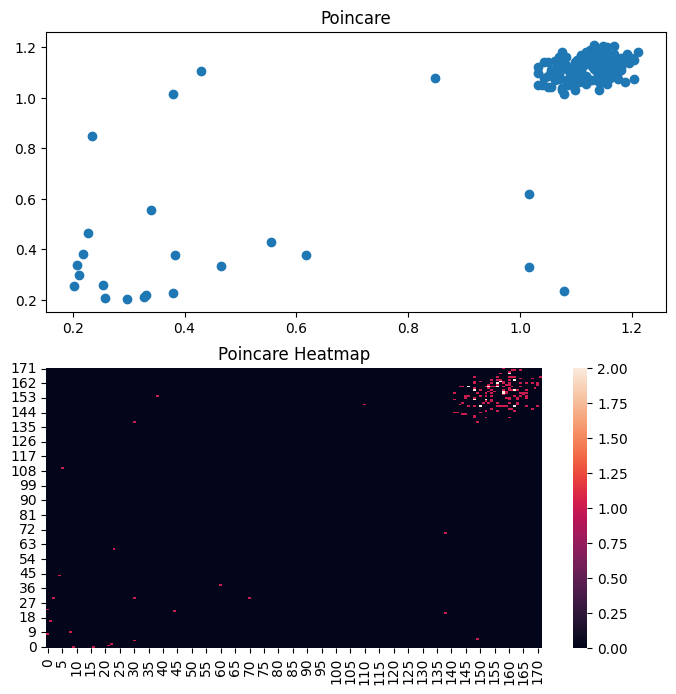

In [89]:
fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].scatter(n2,n1)
ax[0].set_title('Poincare')
#--
sns.heatmap(heatmap.T, ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Poincare Heatmap')

fig.savefig('Output/Compare_Heatmap//poin_heat_sample_3.png', dpi= 300)

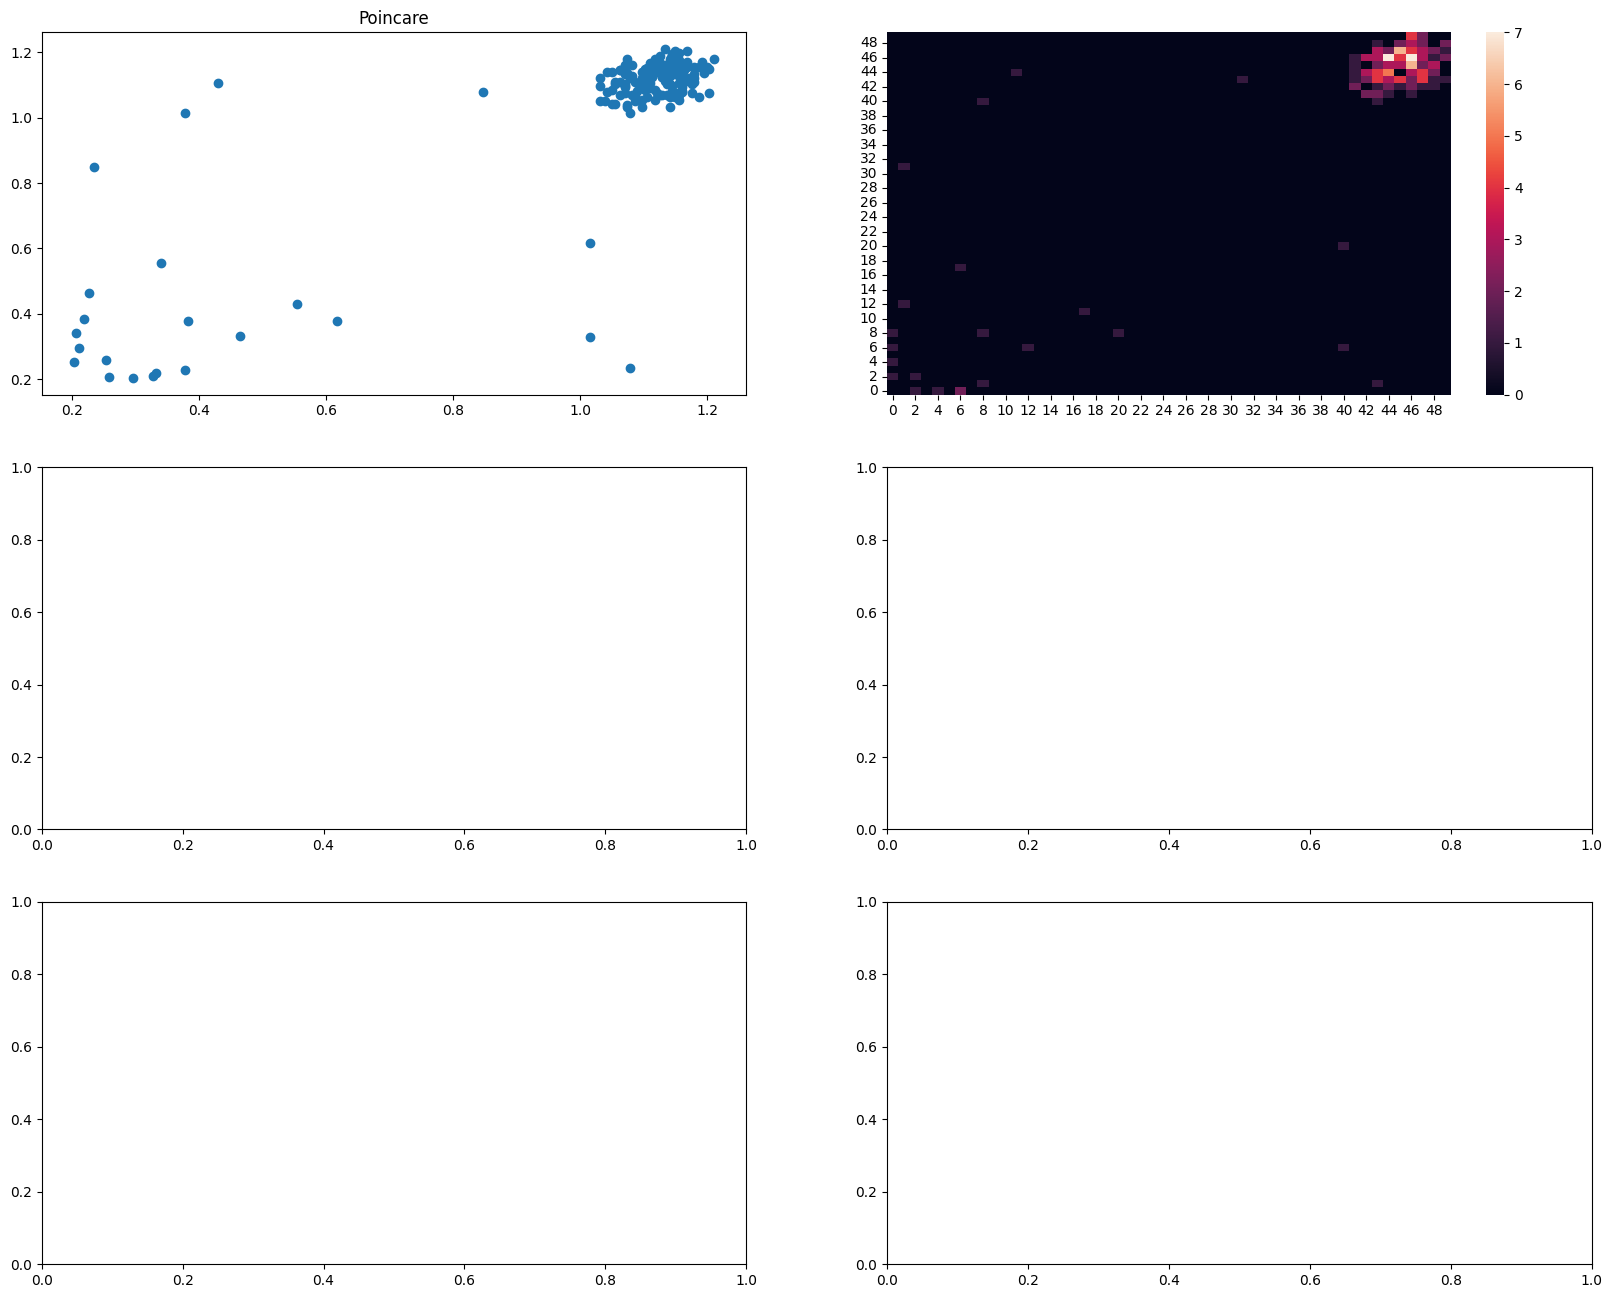

In [64]:
fig, ax = plt.subplots(3,2, figsize=(20,16))
ax[0,0].scatter(n2,n1)
ax[0,0].set_title('Poincare')
#--
sns.heatmap(heatmap.T, ax=ax[0,1])
ax[0,1].invert_yaxis()
ax[0,1].set_title('Poincare Heatmap')
#--
lower_than_one = 
ax[1,0]

# SD1 SD2

In [10]:
hr_sig = string_to_int(indexes[2])
n1, n2 = poincare(hr_sig)

In [11]:
#for vectorize equation
n1 = np.array(n1)
n2 = np.array(n2)

In [12]:
sd1 = np.sqrt(np.var((n1-n2)/(np.sqrt(2))))
sd2 = np.sqrt(np.var((n1+n2)/(np.sqrt(2))))

In [13]:
print(f'ratio : {round(sd1/sd2, 4)}')

ratio : 0.285


In [14]:
"""
sd1 = []
sd2 = []
for i in range(len(n1)):
    sd1.append(np.sqrt(np.var((n1[i]-n2[i])/(np.sqrt(2)))))
    sd2.append(np.sqrt(np.var((n1[i]+n2[i])/(np.sqrt(2))))) """

'\nsd1 = []\nsd2 = []\nfor i in range(len(n1)):\n    sd1.append(np.sqrt(np.var((n1[i]-n2[i])/(np.sqrt(2)))))\n    sd2.append(np.sqrt(np.var((n1[i]+n2[i])/(np.sqrt(2))))) '

In [15]:
n1[0] - n2[0]

-0.01953125

In [16]:
print(sd1)
sd2

0.09812143085453388


0.3442757055149223

In [17]:
line_t = np.linspace(sd1, sd2,num=50)

In [18]:
mean_center = [np.mean(n1) , np.mean(n2)]

In [19]:
mean_center

[1.0305232558139534, 1.030795784883721]

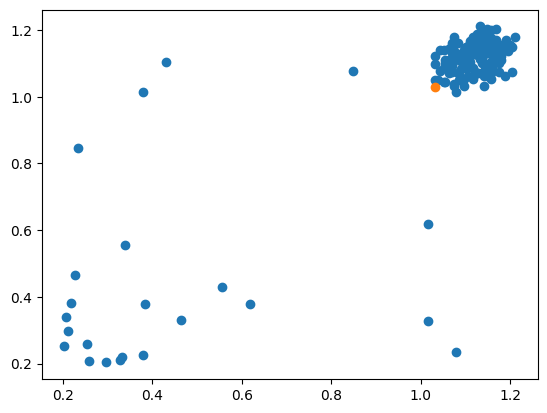

In [20]:
plt.scatter(n2,n1)
plt.scatter(mean_center[1], mean_center[0])
# plt.plot(line_t)

C:\Users\Mreza\AppData\Local\Temp\ipykernel_6052\2699854828.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n1)


<AxesSubplot: ylabel='Density'>

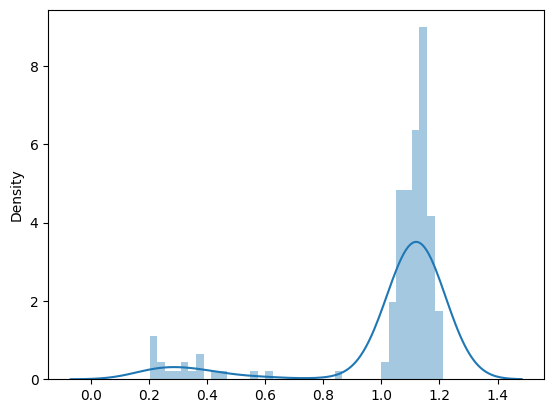

In [21]:
# poin_t = list[n1] and list[n2]
sns.distplot(n1)

In [22]:
no_points = round(len(n1)*60/100)

middle_point = round(len(n1)/2)

sample = n1[int(middle_point-no_points/2) : int(middle_point + no_points/2)]

In [23]:
no_points = round(len(n2)*60/100)

middle_point = round(len(n2)/2)

sample2 = n2[int(middle_point-no_points/2) : int(middle_point + no_points/2)]

In [24]:
n1.shape

(172,)

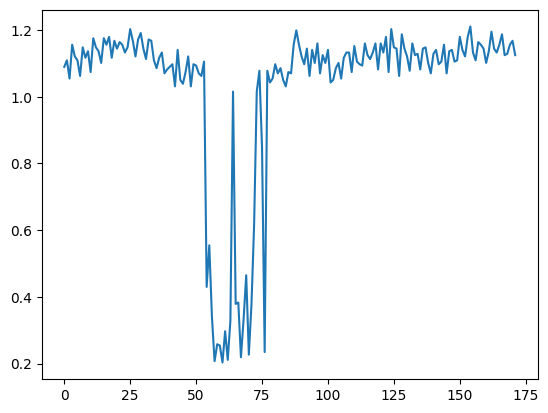

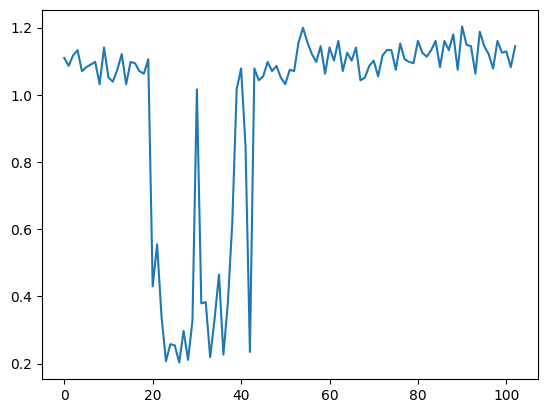

In [25]:
plt.plot(n1);plt.show()
plt.plot(sample)

C:\Users\Mreza\AppData\Local\Temp\ipykernel_6052\1950040031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<AxesSubplot: ylabel='Density'>

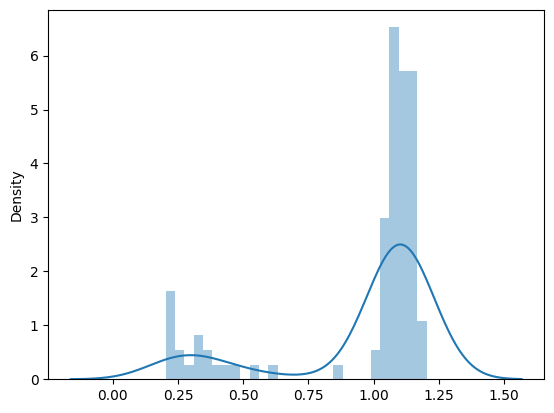

In [26]:
sns.distplot(sample)

In [27]:
var_list = []
for i in range(0,n1.shape[0] - 1):
    var_list.append(np.var([n1[i],n1[i+1]]))

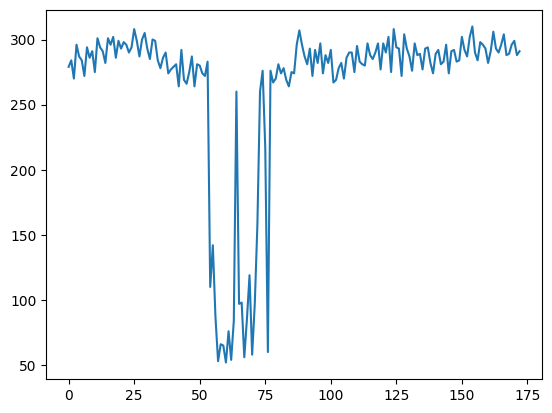

173 171


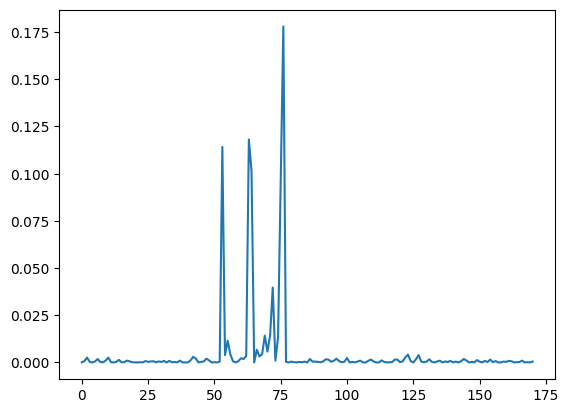

In [28]:
plt.plot(hr_sig);plt.show()
plt.plot(var_list)
print(len(hr_sig), len(var_list))

In [29]:
var_list = np.array(var_list)
new = np.where(var_list<0.003, hr_sig[0:len(hr_sig)-2], np.mean(np.where(var_list<0.001,hr_sig[0:len(hr_sig)-2],hr_sig[0:len(hr_sig)-2])))

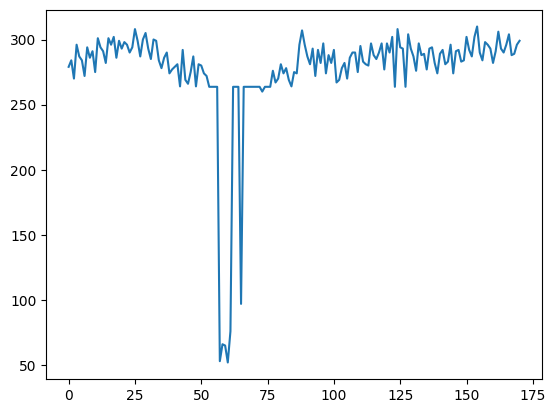

In [30]:
plt.plot(new)

C:\Users\Mreza\AppData\Local\Temp\ipykernel_1728\3724362202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new);plt.show()


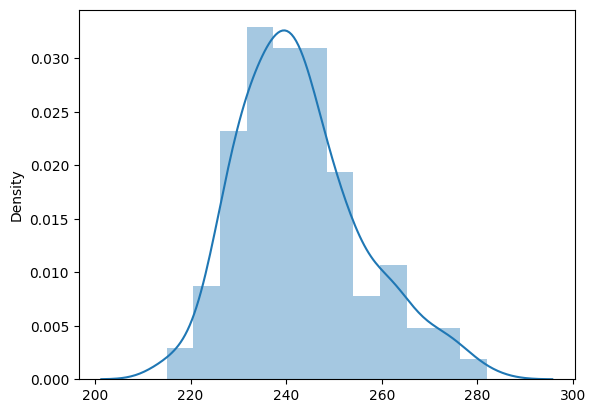

C:\Users\Mreza\AppData\Local\Temp\ipykernel_1728\3724362202.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hr_sig)


<AxesSubplot: ylabel='Density'>

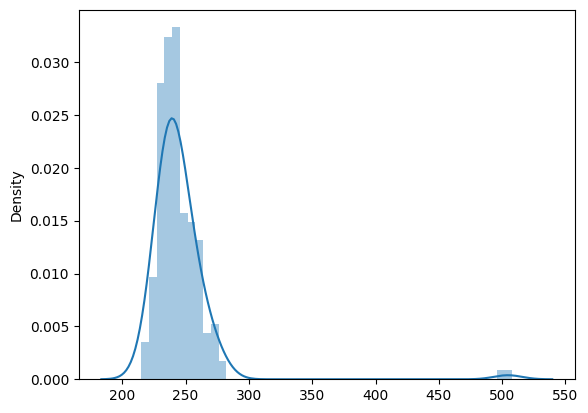

In [286]:
sns.distplot(new);plt.show()
sns.distplot(hr_sig)

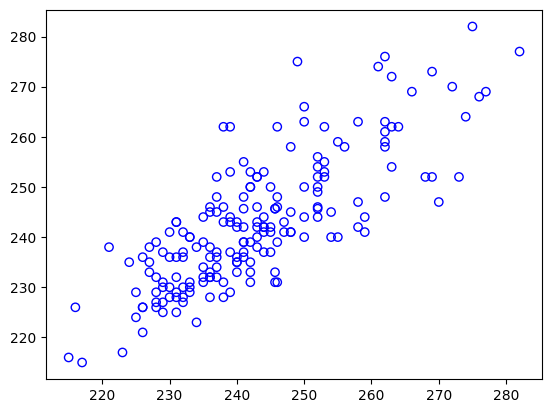

In [287]:
plt.scatter(new[:len(new)-1], new[1:],fc='None',edgecolor='b')

In [108]:
linear = np.linspace(0,1,num=4)

In [290]:
n1 = np.array(new[1:])
n2 = np.array(new[:len(new)-1])
sd1 = np.sqrt(np.var((n1-n2)/(np.sqrt(2))))
sd2 = np.sqrt(np.var((n1+n2)/(np.sqrt(2))))
mean_center = [np.mean(n1) , np.mean(n2)]

In [293]:
sd1/sd2

0.34078098584969274

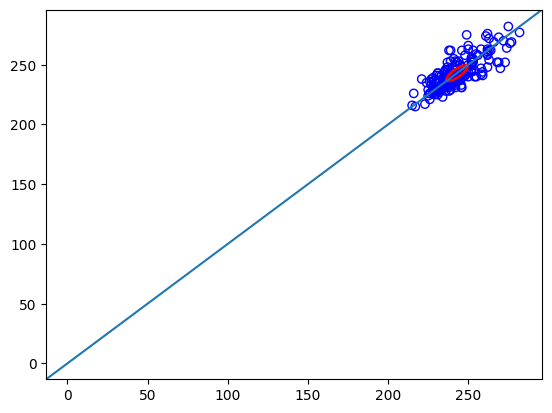

In [291]:
from matplotlib.patches import Ellipse

plt.figure()
ax = plt.gca()

ellipse = Ellipse(xy=(mean_center[0], mean_center[1]), width=sd1, height=sd2, 
                        edgecolor='r', fc='None', lw=2, angle = 315)
ax.scatter(n2, n1,fc='None',edgecolor='b')
ax.add_patch(ellipse)
ax.axline((0.8, 0.8), slope=1)
plt.show()

In [34]:
sd2

0.08217394896914589

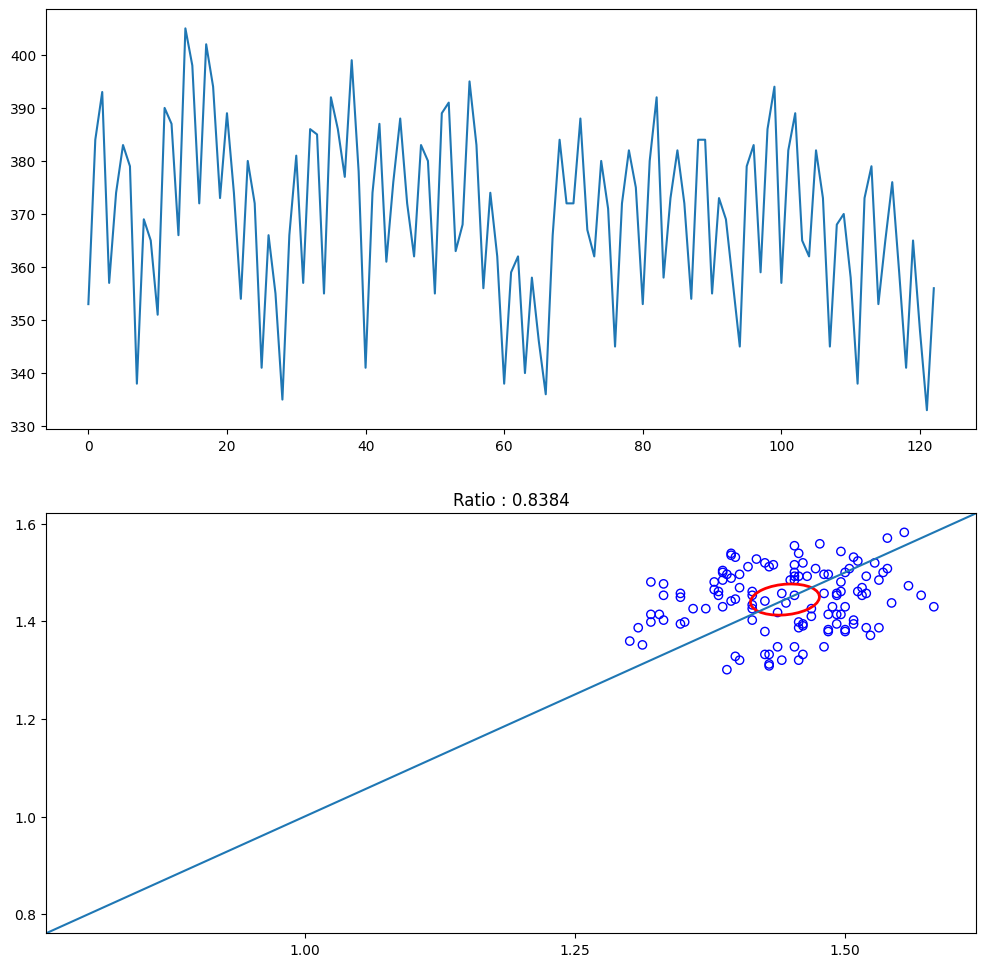

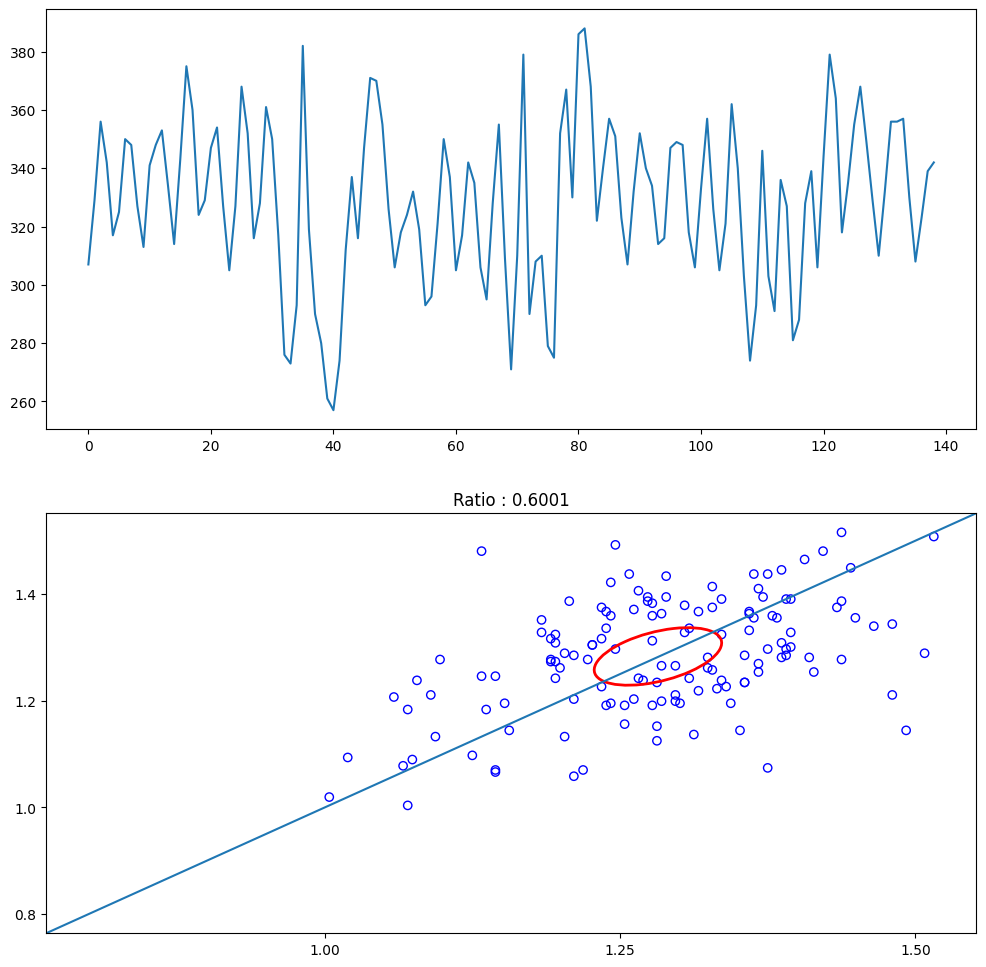

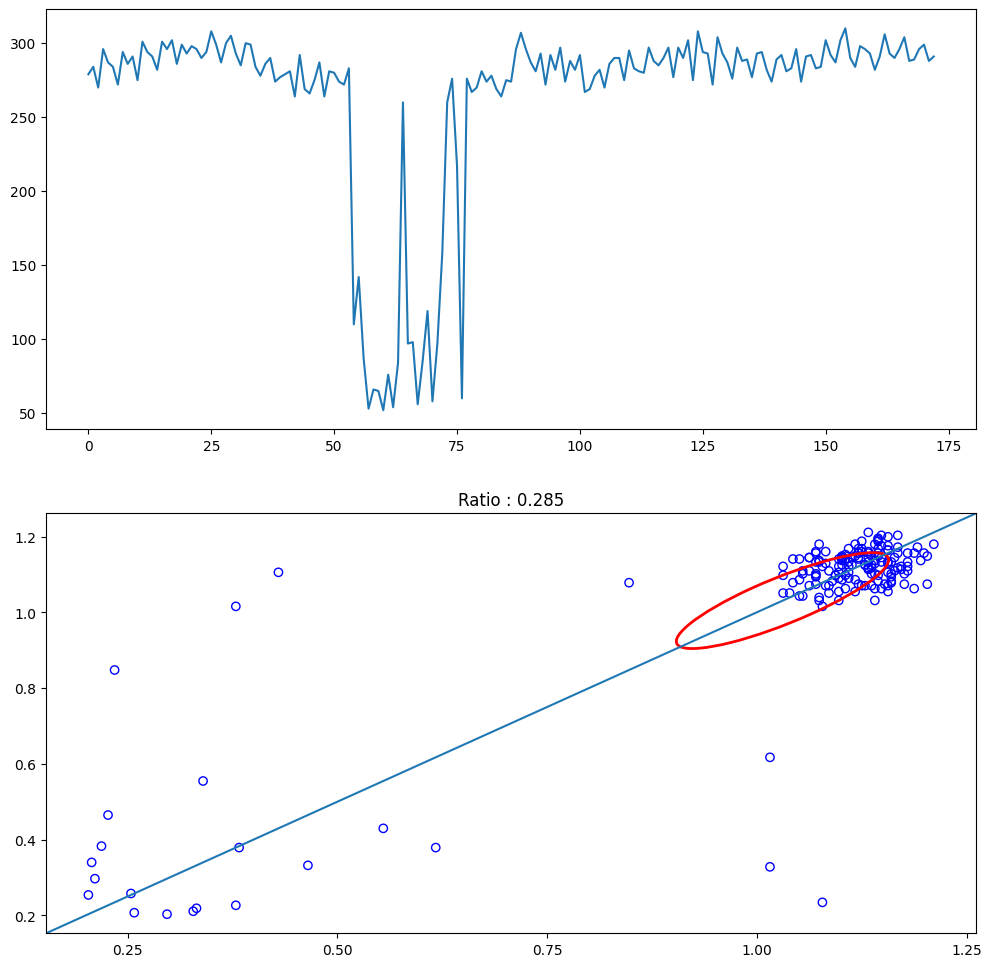

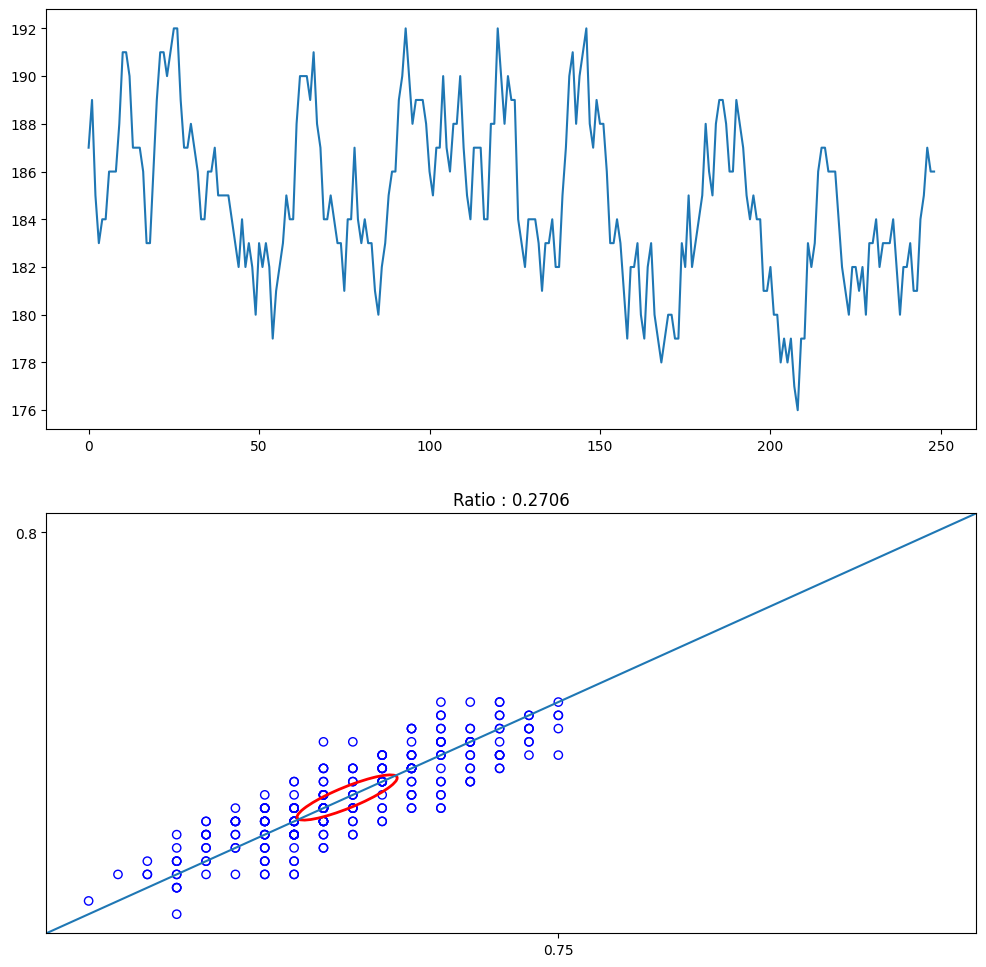

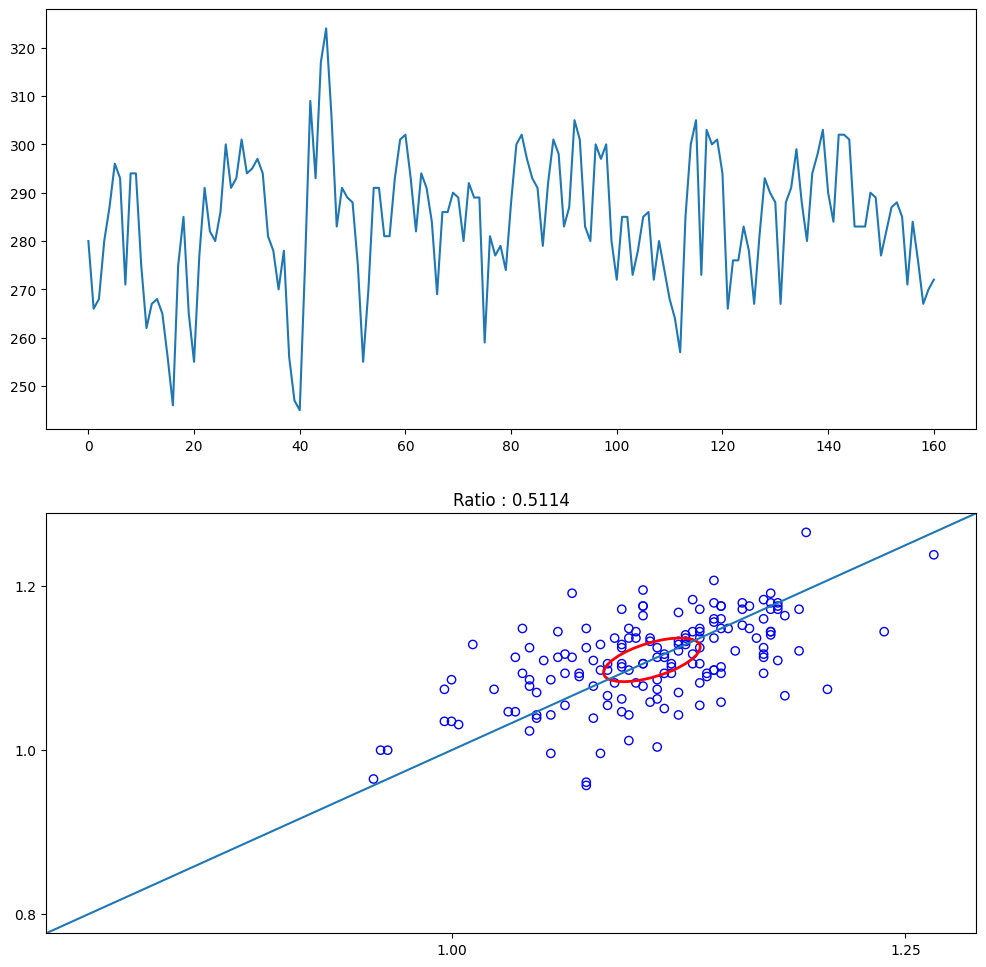

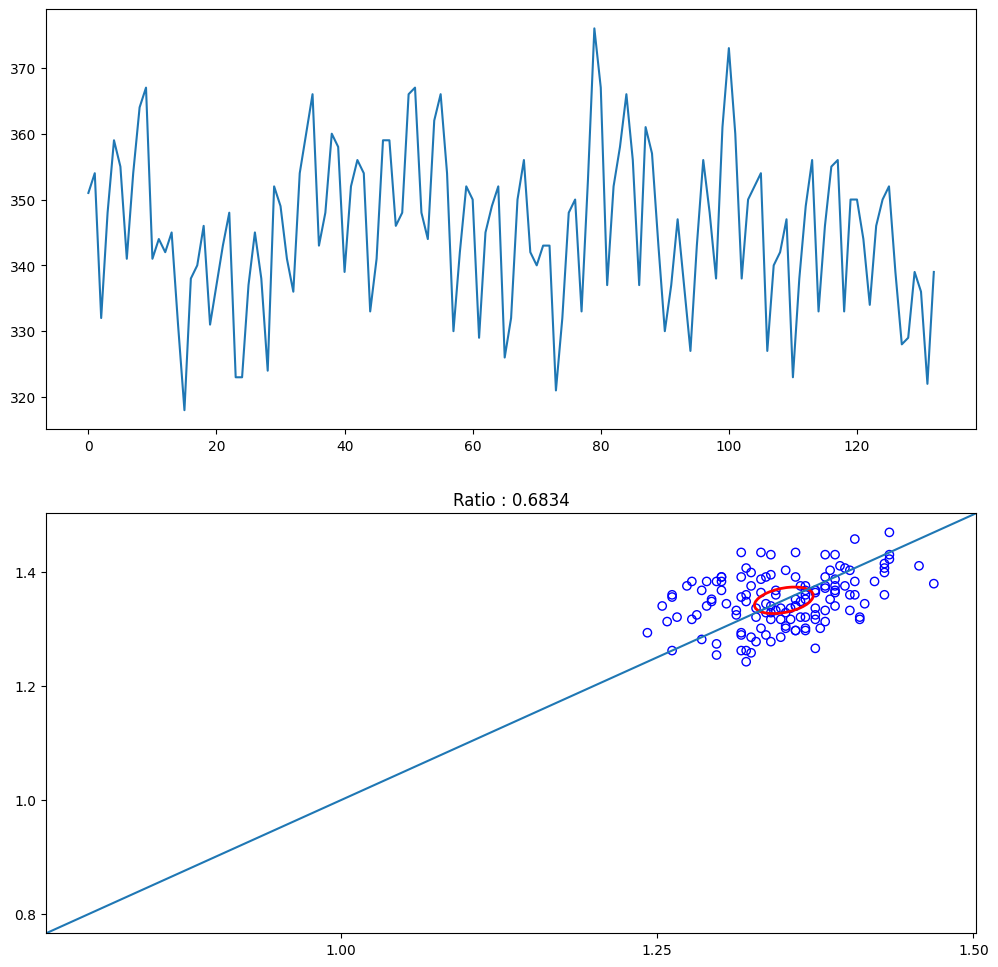

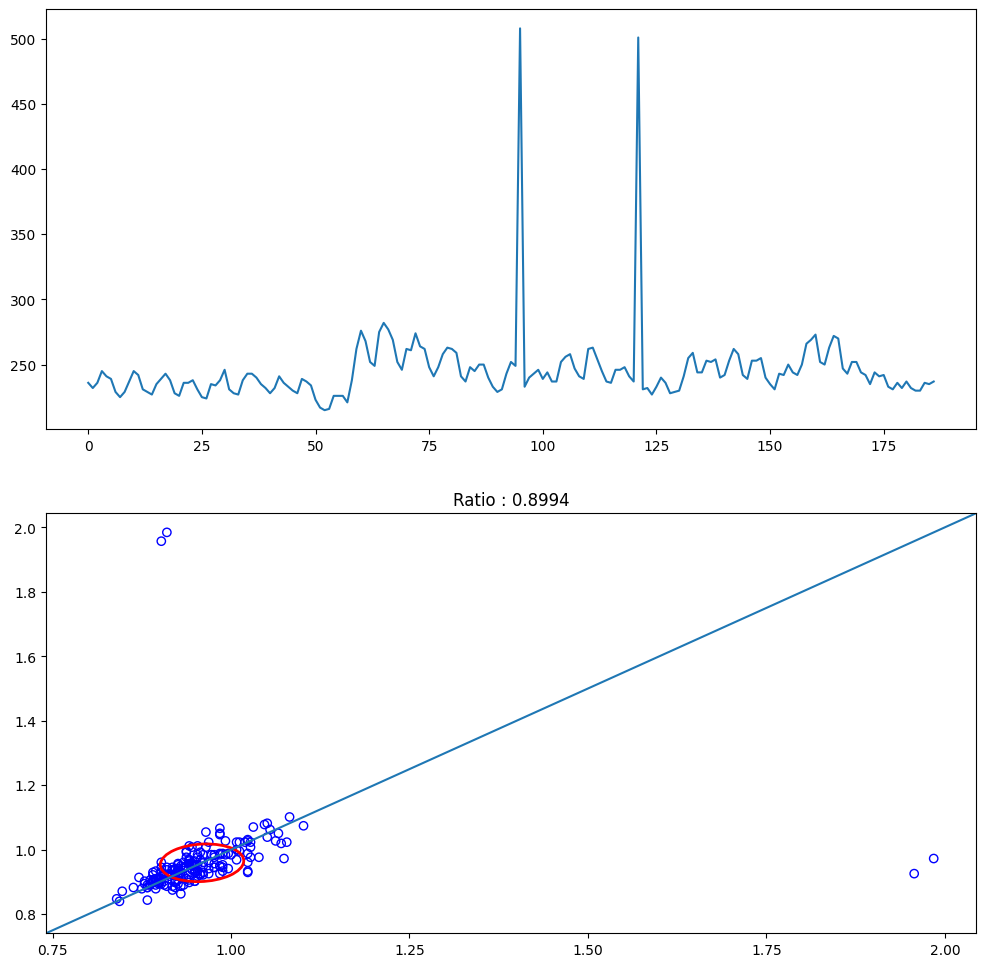

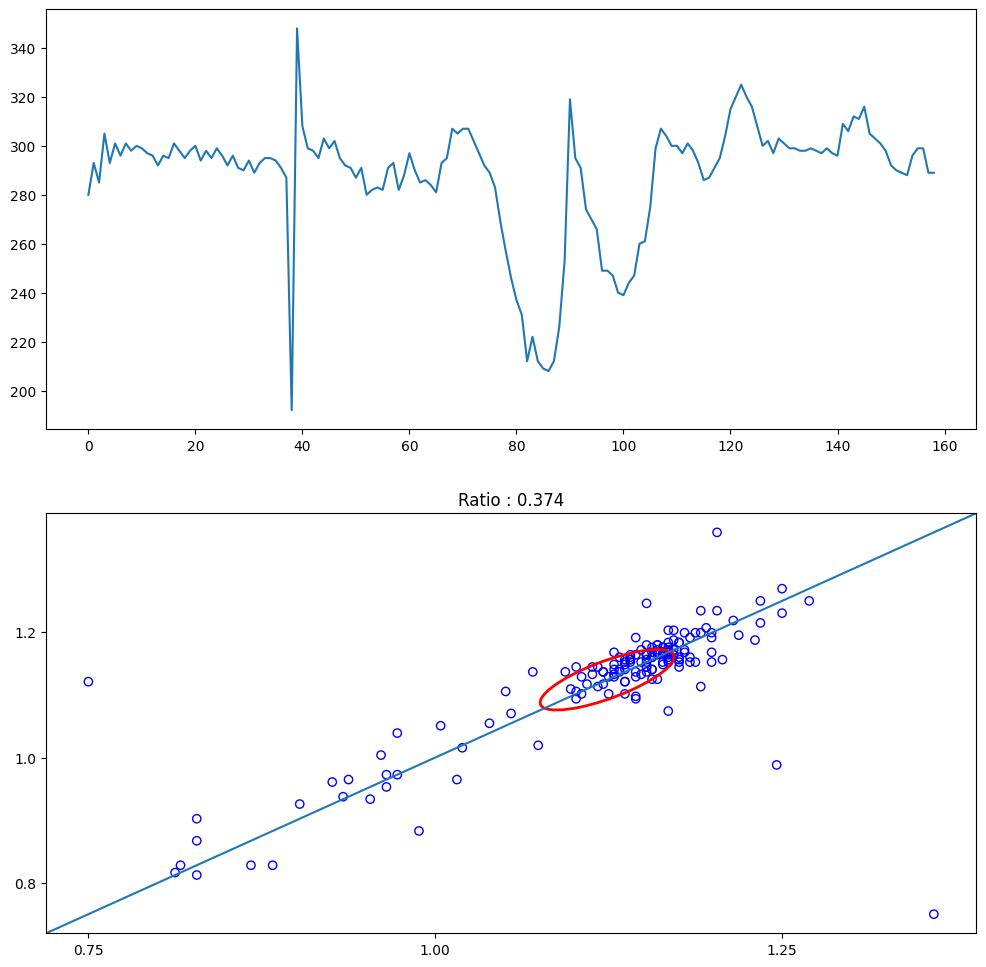

In [123]:
for i in range(8):
    fig, ax = plt.subplots(2,1, figsize=(12,12))
    hr_sig = string_to_int(indexes[i])
    n1, n2 = poincare(hr_sig)
    #for vectorize equation
    n1 = np.array(n1)
    n2 = np.array(n2)
    sd1 = np.sqrt(np.var((n1-n2)/(np.sqrt(2))))
    sd2 = np.sqrt(np.var((n1+n2)/(np.sqrt(2))))
    mean_center = [np.mean(n1) , np.mean(n2)]
    # plt.figure()
    ax[0].plot(hr_sig)
    ax[1] = plt.gca()
    ax[1].scatter(n2,n1,fc='None',edgecolor='b')
    ax[1].set_xticks(np.arange(0, 2.2, step=0.25))
    ax[1].set_yticks(np.arange(0, 2.2, step=0.2))
    ellipse = Ellipse(xy=(mean_center[0], mean_center[1]), width=sd1, height=sd2, 
                        edgecolor='r', fc='None', lw=2, angle = 315)
    ax[1].add_patch(ellipse)
    ax[1].axline((0.8, 0.8), slope=1)                    
    plt.title(f'Ratio : {round(sd1/sd2, 4)}')
    # plt.savefig(f'Output/Compare_Heatmap/Ratio_SD{i+1}.png', dpi=100)
    plt.show()

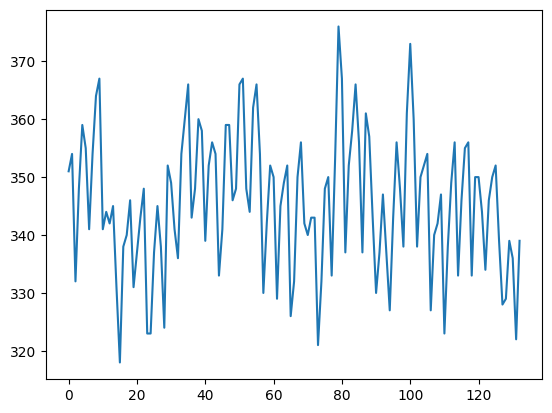

In [9]:
plt.plot(string_to_int(indexes[5]))

In [19]:
with open('sample_rpeaks.txt', 'w') as file:
    file.write(str([test_arr]))

In [23]:
np.savetxt( '/Users/Mreza/Documents/Jupyter/Signal/sample_rpeaks.txt', test_arr)

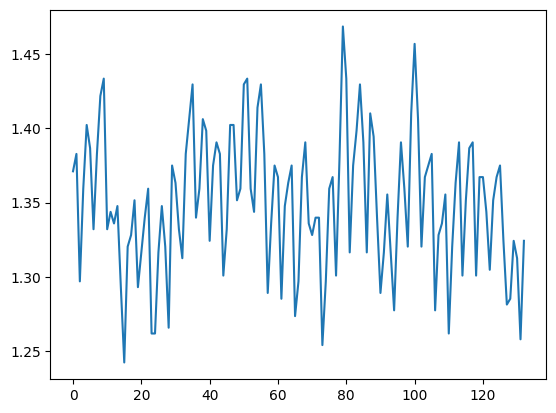

In [16]:
test_arr = np.array([i/256 for i in string_to_int(indexes[5])])
# test_arr
plt.plot(test_arr)